# Lab 7: Non-negative Matrix Factorization

The goal of this lab session is to code a NMF algorithm and use it in some applications.

You have to send the filled notebook named **"L7_familyname1_familyname2.ipynb"** (groups of 2) by email to aml.centralesupelec.2019@gmail.com before 23:59 on December 5, 2018 and put **"AML-L7"** in the subject. 

We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
from scipy.stats import entropy as normKL

## NMF

Non-negative Matrix Factorization is a model where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to interpret.

Fill in the following class that implements a NMF by multiplicative updates using the Frobenius norm or the Kullback-Leiber divergence as loss function (implement both), you can add more methods if needed. Try 10 different random initializations and choose the best one.

In [2]:
class my_NMF():
    
    def __init__(self, n_components, loss, epsilon, max_iter = 300):
        '''
        Attributes:
        
        n_components_ : integer
            the unknown dimension of W and H
        max_iter_: integer
            maximum number of iterations
        epsilon_: float
            convergence
        loss_ = {"Frobenius", "KL"}
        w_: np.array
            W Matrix factor
        H_: np.array
            H Matrix factor
        '''
        self.n_components_ = n_components
        self.max_iter_ = max_iter
        self.loss_ = loss
        self.epsilon_ = epsilon
        self.W_ = None
        self.H_ = None
    def Kl_loss(self,X,Y):
        return(np.sum(X*np.log(X/Y)-X+Y,axis=None))
        
    def fit_transform(self, X):
        """ Find the factor matrices W and H
        
        Parameters:
        -----------
        X: (p, n) np.array
            Data matrix
        
        Returns:
        -----
        self
        """        
        # TODO:
        # initialize both matrices
        #            random(0, 1)
        (p,n)= np.shape(X)
        Dist_min= np.inf
        for i in range(10):
            W= np.random.rand(p, self.n_components_)
            H= np.random.rand(self.n_components_, n)
            err=100
            l=1
            if self.loss_=='Frobenius':
                while  (err> self.epsilon_) and l < self.max_iter_:
                    err=np.linalg.norm(X-np.dot(W,H), 'fro')
                    l+=1
                    W = W* np.dot(X,H.T)/np.dot(W,np.dot(H,H.T))
                    H = H* np.dot(W.T,X)/np.dot(W.T,np.dot(W,H))
                if np.linalg.norm(X-np.dot(W,H), 'fro') < Dist_min:
                    Dist_min = np.linalg.norm(X-np.dot(W,H), 'fro')
                    self.W_=W 
                    self.H_= H
            ident = np.ones((p,n))
            if self.loss_=='KL' :
                while  (err> self.epsilon_) and l < self.max_iter_:
                    W= W * (np.dot(X/np.dot(W,H), H.T))/(np.dot(ident, H.T))
                    H= H * (np.dot(W.T,X/np.dot(W,H)))/(np.dot(W.T, ident))
                    err=np.sum(np.dot(W,H)-X) + normKL(X.flatten(),np.dot(W,H).flatten())
                    l+=1
                if np.linalg.norm(X-np.dot(W,H), 'fro') < Dist_min:
                    Dist_min = np.linalg.norm(X-np.dot(W,H), 'fro')
                    self.W_= W
                    self.H_= H
        return (self.W_ , self.H_)     

**Bonus (not graded)**: Implement the regularized version

## Applications

### First application

For the first application you are going to analyse the following data to give an interpretation of the factorization:

(400, 4096)

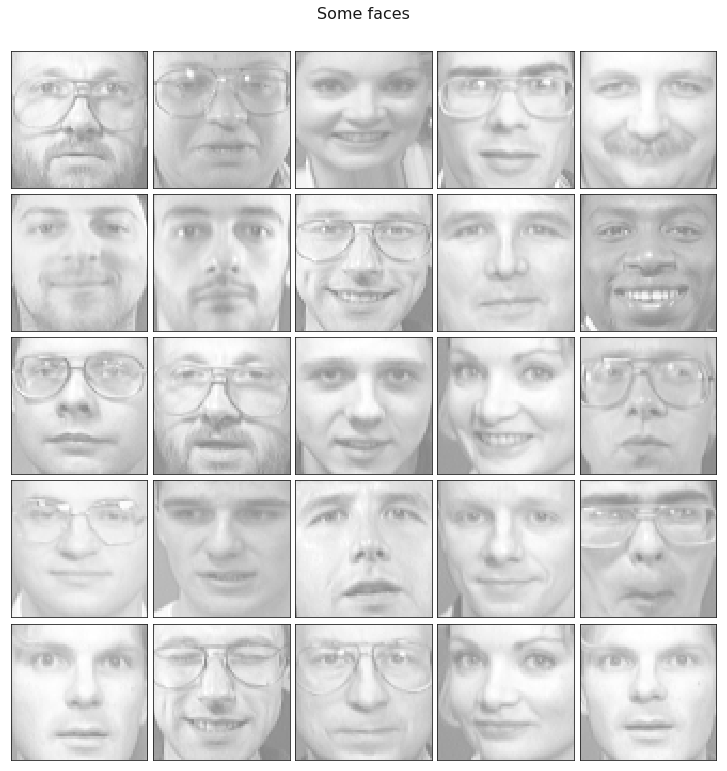

In [3]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces(shuffle=True)

faces = dataset.data
image_shape = (64, 64)

n_samples, n_features = faces.shape

def plot_faces(title, images, image_shape, n_col=5, n_row=5, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
def plot_face_weights(im_number, grid, image_shape):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
    plt.setp((ax1, ax2, ax3), xticks=[], yticks=[])
    
    ax1.imshow(faces[im_number].reshape(image_shape), cmap=plt.cm.gray)
    ax1.set_title("True Face", fontsize="12")
    
    ax2.imshow(model.W_.dot(model.H_)[im_number].reshape(image_shape), cmap=plt.cm.gray)
    ax2.set_title("Approximated Face", fontsize="12")
    
    ax3.imshow(model.H_[:,im_number].reshape(grid,grid), cmap=plt.cm.gray)
    ax3.set_title("Face weights for each facial features above", fontsize="12")    

    plt.tight_layout()
    plt.show()    
plot_faces("Some faces", faces[:25], image_shape)

faces.shape

Apply your NMF algorithm for this dataset and plot the approximated face pictures.

(25, 4096)


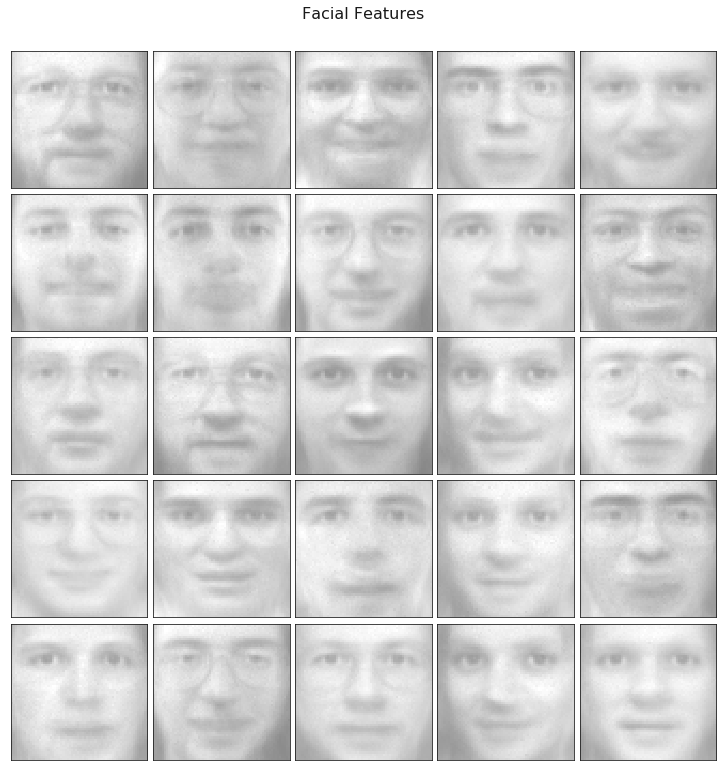

In [4]:
n_components=36
model= my_NMF(n_components,'KL',0.01)
W,H= model.fit_transform(faces)
print(np.shape(np.dot(W,H)[:25]))
plot_faces("Facial Features", np.dot(W,H)[:25], image_shape)

- Plot the $W$ matrix as images in a $(\sqrt{r}, \sqrt{r})$ grid
- Choose one face, plot its corresponding weights (in $H$) in a grid  and explain the interpretation of both factor matrices.

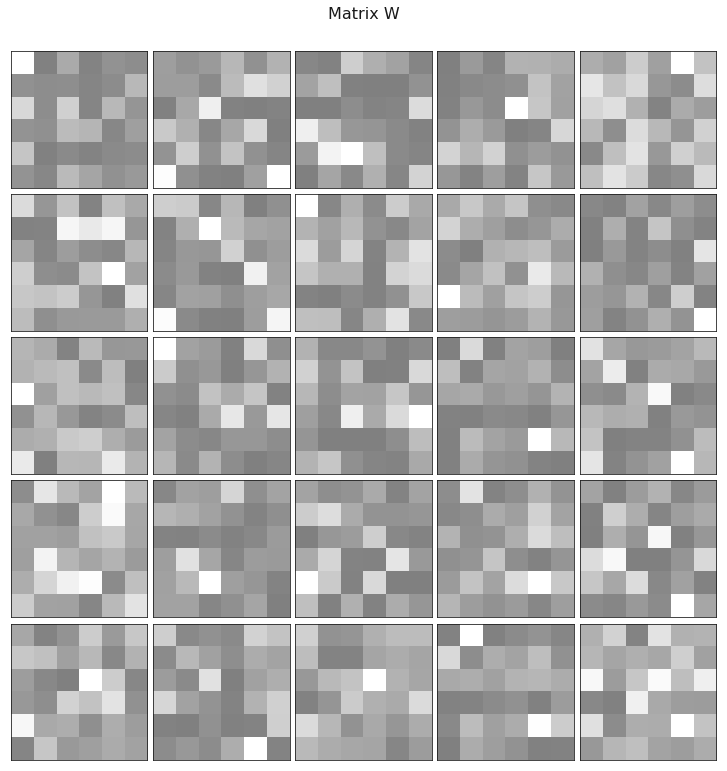

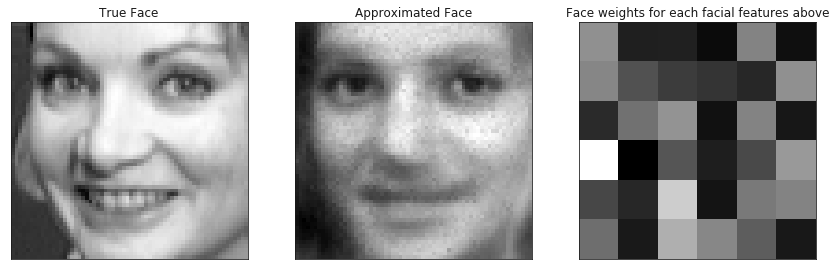

In [5]:
# TODO
r= np.shape(W)[1]
plot_faces("Matrix W", W[:25], (int(np.sqrt(r)),int(np.sqrt(r))), n_col=5, n_row=5, cmap=plt.cm.gray)
face_number=13
grid=int(np.sqrt(n_components))
plot_face_weights(face_number, grid, (64,64))

### Second application

Import the 20newsgroups dataset (from sklearn.datasets import fetch_20newsgroups_vectorized) that contains a collection of ~18,000 newsgroup documents from 20 different newsgroups.

Model the topics present in a subsample with NMF. Print the most common words of each topic.

In [6]:
# TODO
from sklearn.datasets import fetch_20newsgroups_vectorized, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading the documents text
docs_text=fetch_20newsgroups().data

# Vectorizing the documents with TF IDF
vectorizer=TfidfVectorizer(stop_words="english",min_df=0.003)
docs_vectorized=vectorizer.fit_transform(docs_text)
vocab=np.array(vectorizer.get_feature_names())
print(docs_vectorized.shape)

(11314, 5780)


In [7]:
n_topics=10
model_2=my_NMF(loss='Frobenius',epsilon=1e-2,n_components=n_topics,max_iter=50)
model_2.fit_transform(docs_vectorized.toarray().T)

(array([[8.81510998e-04, 5.10543425e-04, 1.84285072e-04, ...,
         2.57099028e-03, 8.86483050e-04, 6.39952683e-04],
        [9.15883179e-06, 4.79340777e-22, 3.81779234e-03, ...,
         4.04267266e-04, 5.98156473e-06, 4.88307568e-04],
        [3.96721447e-04, 1.16111469e-03, 9.62848653e-07, ...,
         1.22317662e-04, 1.35893357e-04, 3.91478148e-04],
        ...,
        [4.23249830e-31, 4.87546114e-09, 2.08970312e-06, ...,
         2.14126937e-07, 1.30391925e-05, 4.46188761e-14],
        [3.45685512e-36, 4.14141199e-74, 1.77135853e-03, ...,
         2.01668122e-95, 3.37477961e-37, 1.00310401e-31],
        [6.22457522e-11, 1.66638863e-33, 2.44698538e-07, ...,
         5.52730498e-16, 8.88779306e-05, 6.46569686e-04]]),
 array([[2.78047480e-01, 1.20904514e-01, 1.23541954e+00, ...,
         3.38922487e-01, 6.01405160e-01, 2.58728968e-01],
        [2.94788926e-07, 1.66763124e-04, 2.09009221e-01, ...,
         7.46012763e-06, 1.97711671e-01, 1.84065395e-13],
        [1.20107841e+00, 

In [8]:
# Most common words of each topic
import pandas as pd
topics=vocab[np.argsort(model_2.W_.T,axis=1)[:,::-1].flatten()].reshape(model_2.W_.T.shape).T[:10,:]
pd.DataFrame(topics, columns=["Topic {}".format(i+1) for i in range(n_topics)])

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,windows,god,people,ca,key,nasa,pitt,drive,edu,com
1,uk,jesus,don,team,clipper,gov,geb,scsi,university,netcom
2,ac,bible,think,game,chip,space,gordon,ide,host,hp
3,window,christian,just,hockey,encryption,jpl,banks,controller,nntp,article
4,file,christians,gun,players,keys,larc,cs,drives,posting,writes
5,dos,faith,like,games,escrow,jsc,cadre,disk,cc,ibm
6,files,christ,israel,year,government,gsfc,dsl,card,article,sun
7,program,believe,government,play,access,center,n3jxp,hard,organization,organization
8,use,people,right,season,algorithm,research,chastity,bus,subject,subject
9,help,church,said,nhl,security,___,shameful,mac,lines,lines
